# Phase resolved spectroscopy

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
/bin/rm -rf 2795
/bin/rm -f {acis,pcad}f*.fits 
download_chandra_obsid 2795 --exclude vvref,osol
chandra_repro 2795 out="./" clob+


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  asol     fits        5 Mb  ####################          < 1 s  69064.1 kb/s
  mtl      fits        4 Mb  ####################          < 1 s  13987.0 kb/s
  evt1     fits        2 Mb  ####################          < 1 s  33549.6 kb/s
  evt2     fits      650 Kb  ####################          < 1 s  23469.8 kb/s
  stat     fits      626 Kb  ####################          < 1 s  22658.4 kb/s
  aqual    fits      320 Kb  ####################          < 1 s  18824.6 kb/s
  eph1     fits      281 Kb  ####################          < 1 s  9301.0 kb/s
  eph1     fits      273 Kb  ####################          < 1 s  16207.9 kb/s
  eph1     fits      252 Kb  ####################          < 1 s  15201.6 kb/s
  bias     fits       67 Kb  ####################          < 1 s  4366.4 kb/s
  cntr_img jpg        63 Kb  ####################      

## Look at data

In [3]:
cat << EOM > ciao.reg
circle(4144.93,4041.9479,10.0)
EOM

[1] 51153
[1]+  Done                    ds9 acisf02795_repro_evt2.fits -scale log -region ciao.reg -zoom 2 -saveimage ds9_01.png


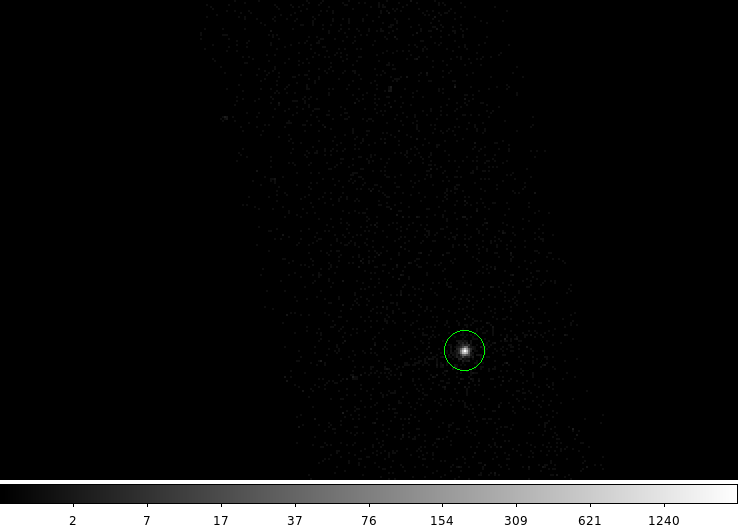

In [4]:
ds9 acisf02795_repro_evt2.fits -scale log -region ciao.reg -zoom 2 \
  -saveimage ds9_01.png &
sleep 10
xpaset -p ds9 quit


display < ds9_01.png


In [5]:
dmcopy "acisf02795_repro_evt2.fits[sky=region(ciao.reg),energy=500:7000]" \
   RXJ0806.3+1527.evt clob+

## Bary Center Correction

In [6]:
punlearn dmcoords
dmcoords RXJ0806.3+1527.evt op=sky x=4144.93 y=4041.9479 celfmt=deg verb=0
ra=`pget dmcoords ra`
dec=`pget dmcoords dec`
echo $ra $dec

121.5956933655199 15.45862251788717


In [7]:
axbary RXJ0806.3+1527.evt \
  2795/primary/orbitf121694700N001_eph1.fits.gz \
  RXJ0806.3+1527_bary.evt ra=${ra} dec=${dec} clobber=yes

 
axbary_ar -i 2795/primary/orbitf121694700N001_eph1.fits.gz -f RXJ0806.3+1527.evt -o RXJ0806.3+1527_bary.evt -ra 121.5956933655199 -dec 15.45862251788717 -debug
 
axBary: Principal HDU  -  TIERRELA = 0.000000, TIERABSO = 0.000050
axBary: Clock correction 0.000000 -  TIERABSO = -1.000000
axBary: Using JPL Planetary Ephemeris DE-405
axBary: bary stuff initialized in HDU 0
axBary: HDU 0 TSTART = 121940918.990110, TSTOP = 121964279.253540
axBary: HDU 0 TSTART = 121941081.557230, TSTOP = 121964444.020369 (corrected)
axBary: Using JPL Planetary Ephemeris DE-405
axBary: bary stuff initialized in HDU 1
axBary: HDU 1 TSTART = 121940918.990110, TSTOP = 121964279.253540
axBary: HDU 1 TSTART = 121941081.557230, TSTOP = 121964444.020369 (corrected)
axBary: Using JPL Planetary Ephemeris DE-405
axBary: bary stuff initialized in HDU 2
axBary: HDU 2 TSTART = 121940918.990110, TSTOP = 121964279.253540
axBary: HDU 2 TSTART = 121941081.557230, TSTOP = 121964444.020369 (corrected)


In [8]:
axbary pcadf02795_000N001_asol1.fits \
    2795/primary/orbitf121694700N001_eph1.fits.gz \
    RXJ0806.3+1527_bary.asol ra=${ra} de=${dec} clobber=yes

 
axbary_ar -i 2795/primary/orbitf121694700N001_eph1.fits.gz -f pcadf02795_000N001_asol1.fits -o RXJ0806.3+1527_bary.asol -ra 121.5956933655199 -dec 15.45862251788717 -debug
 
axBary: Principal HDU  -  TIERRELA = 0.000000, TIERABSO = 0.000050
axBary: Clock correction 0.000000 -  TIERABSO = -1.000000
axBary: Using JPL Planetary Ephemeris DE-405
axBary: bary stuff initialized in HDU 0
axBary: HDU 0 TSTART = 121941471.208880, TSTOP = 121962693.065980
axBary: HDU 0 TSTART = 121941633.827605, TSTOP = 121962857.682213 (corrected)
axBary: Using JPL Planetary Ephemeris DE-405
axBary: bary stuff initialized in HDU 1
axBary: HDU 1 TSTART = 121941471.208880, TSTOP = 121962693.065980
axBary: HDU 1 TSTART = 121941633.827605, TSTOP = 121962857.682213 (corrected)


In [9]:
dmhedit RXJ0806.3+1527_bary.evt file= op=add key=asolfile value=RXJ0806.3+1527_bary.asol

In [10]:
axbary acisf02795_000N004_stat1.fits \
  2795/primary/orbitf121694700N001_eph1.fits.gz \
  RXJ0806.3+1527_bary.expstats ra=${ra} de=${dec} clobber=yes

 
axbary_ar -i 2795/primary/orbitf121694700N001_eph1.fits.gz -f acisf02795_000N004_stat1.fits -o RXJ0806.3+1527_bary.expstats -ra 121.5956933655199 -dec 15.45862251788717 -debug
 
axBary: Principal HDU  -  TIERRELA = 0.000000, TIERABSO = 0.000050
axBary: Clock correction 0.000000 -  TIERABSO = -1.000000
axBary: Using JPL Planetary Ephemeris DE-405
axBary: bary stuff initialized in HDU 0
axBary: HDU 0 TSTART = 121940918.990110, TSTOP = 121964279.253540
axBary: HDU 0 TSTART = 121941081.557230, TSTOP = 121964444.020369 (corrected)
axBary: Using JPL Planetary Ephemeris DE-405
axBary: bary stuff initialized in HDU 1
axBary: HDU 1 TSTART = 121940918.990110, TSTOP = 121964279.253540
axBary: HDU 1 TSTART = 121941081.557230, TSTOP = 121964444.020369 (corrected)
axBary: Using JPL Planetary Ephemeris DE-405
axBary: bary stuff initialized in HDU 2
axBary: HDU 2 TSTART = 121940918.990110, TSTOP = 121964279.253540
axBary: HDU 2 TSTART = 121941081.557230, TSTOP = 121964444.020369 (corrected)
===> No 

## Create lightcurve

In [11]:
dmextract "RXJ0806.3+1527_bary.evt[bin time=::20]" RXJ0806.3+1527.lc op=ltc1 clob+ 

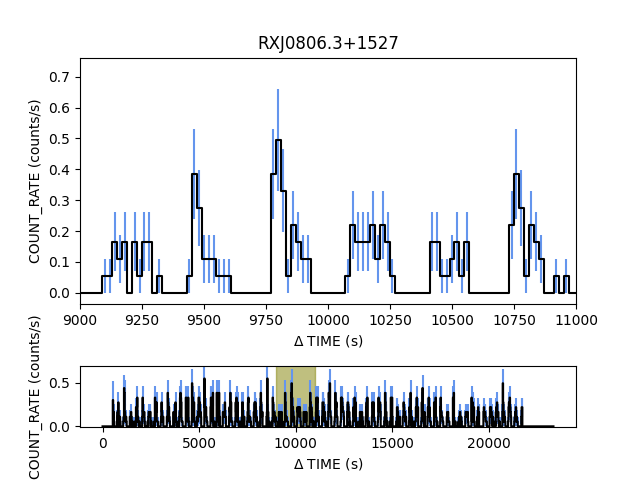

In [12]:
cat << EOM > c1.py
from pycrates import read_file
import matplotlib.pylab as plt

tab = read_file("RXJ0806.3+1527.lc")
x = tab.get_column("dt").values
y = tab.get_column("count_rate").values
ye = tab.get_column("count_rate_err").values

grid = plt.GridSpec(6,1,wspace=0.0, hspace=0.0)
plt.subplot(grid[0:4,0])

plt.errorbar( x, y, yerr=ye, color="black", marker="None", ecolor="cornflowerblue", drawstyle="steps-mid")
plt.xlim(9000,11000)
plt.ylabel("COUNT_RATE (counts/s)")
plt.xlabel(r"$\Delta$ TIME (s)")
plt.title("RXJ0806.3+1527")

plt.subplot(grid[5,0])
plt.errorbar( x, y, yerr=ye, color="black", marker="None", ecolor="cornflowerblue", drawstyle="steps-mid")
plt.fill([9000,11000,11000,9000],[-1,-1,1,1],color="olive", alpha=0.5)
plt.ylim(-0.01, 0.7)
plt.ylabel("COUNT_RATE (counts/s)")
plt.xlabel(r"$\Delta$ TIME (s)")

plt.savefig("chips_01.png")
EOM

python c1.py
display < chips_01.png

## GLVARY

In [13]:
glvary RXJ0806.3+1527_bary.evt outfile=glvary.prob lcfile=glvary.lc effile="" clob+

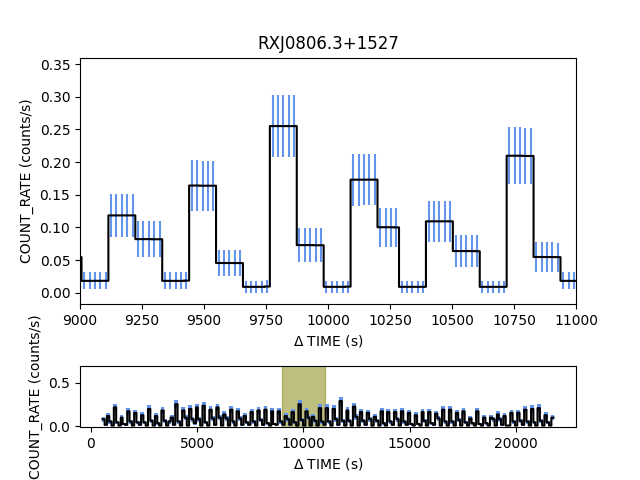

In [14]:
cat << EOM > c2.py
from pycrates import read_file
import matplotlib.pylab as plt

tab = read_file("glvary.lc")
x = tab.get_column("time").values
x=x-121941091.557230
y = tab.get_column("count_rate").values
ye = tab.get_column("count_rate_err").values

grid = plt.GridSpec(6,1,wspace=0.0, hspace=0.0)
plt.subplot(grid[0:4,0])

plt.errorbar( x, y, yerr=ye, color="black", marker="None", ecolor="cornflowerblue", drawstyle="steps-mid")
plt.xlim(9000,11000)
plt.ylabel("COUNT_RATE (counts/s)")
plt.xlabel(r"$\Delta$ TIME (s)")
plt.title("RXJ0806.3+1527")

plt.subplot(grid[5,0])
plt.errorbar( x, y, yerr=ye, color="black", marker="None", ecolor="cornflowerblue", drawstyle="steps-mid")
plt.fill([9000,11000,11000,9000],[-1,-1,1,1],color="olive", alpha=0.5)
plt.ylim(-0.01, 0.7)
plt.ylabel("COUNT_RATE (counts/s)")
plt.xlabel(r"$\Delta$ TIME (s)")

plt.savefig("chips_02.png")
EOM

python c2.py
display < chips_02.png 

## Power spectrum

In [15]:
dmstat "RXJ0806.3+1527.lc[cols count_rate]" verb=0 
mean=`pget dmstat out_mean`
echo $mean

0.072791138986


In [16]:
dmtcalc RXJ0806.3+1527.lc RXJ0806.3+1527_mean_offset.lc \
   exp="count_rate=count_rate-${mean}" clob+

In [17]:
apowerspectrum infilereal="RXJ0806.3+1527_mean_offset.lc[cols time,count_rate]" infileimag=none \
  outfile=RXJ0806.3+1527.power clob+

dmlist RXJ0806.3+1527.power cols

 
--------------------------------------------------------------------------------
Columns for Table Block POWERSPECTRUM
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   FREQUENCY            (s)**-1      Real8          -Inf:+Inf            
   2   DATA                              Real4          -Inf:+Inf            


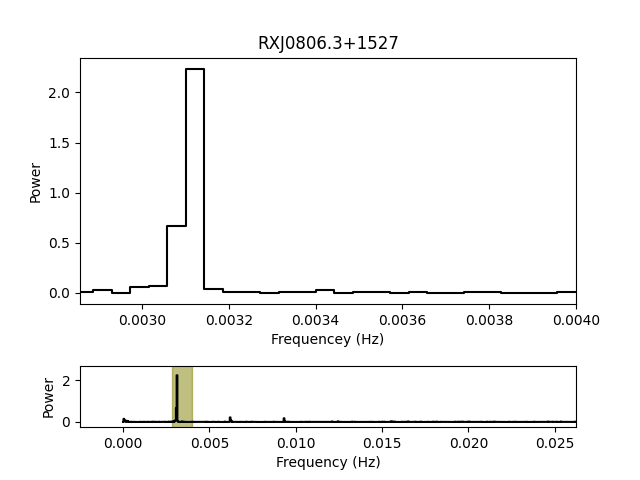

In [18]:
cat << EOM > c3.py

from pycrates import read_file
import matplotlib.pylab as plt

tab = read_file("RXJ0806.3+1527.power")
x = tab.get_column("frequency").values
y = tab.get_column("data").values

grid = plt.GridSpec(6,1,wspace=0.0, hspace=0.0)
plt.subplot(grid[0:4,0])

plt.plot( x, y, color="black", marker="None", drawstyle="steps-mid")
plt.xlim(1.0/350, 1.0/250)
plt.ylabel("Power")
plt.xlabel("Frequencey (Hz)")
plt.title("RXJ0806.3+1527")

plt.subplot(grid[5,0])
plt.plot( x, y, color="black", marker="None", drawstyle="steps-mid")
plt.fill([1.0/350,1.0/350,1.0/250,1.0/250],[-1,10,10,-1],color="olive", alpha=0.5)
plt.ylim(-0.25, 2.7)
plt.xlim(right=0.026239)
plt.ylabel("Power")
plt.xlabel("Frequency (Hz)")

plt.savefig("chips_03.png")
EOM

python c3.py
display < chips_03.png


## Period Fold

In [19]:
dmkeypar RXJ0806.3+1527_bary.evt tstart echo+

121941081.55723


In [20]:
pfold RXJ0806.3+1527_bary.evt RXJ0806.3+1527.fold periodgrid=300:400:0.01 \
   tzero=121941081.557 clobber=yes

In [21]:
dmlist RXJ0806.3+1527.fold cols,blocks

 
--------------------------------------------------------------------------------
Dataset: RXJ0806.3+1527.fold
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: RXJ0806.3+1527.fold            Table         8 cols x 10001    rows
 
--------------------------------------------------------------------------------
Columns for Table Block RXJ0806.3+1527.fold
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   PERIOD               sec          Real8          -Inf:+Inf            Folded Period
   2   PHASE_MID[10]                     Real8(10)      -Inf:+Inf            PHASE GRID
   3   COUNTS[10]                        Int4(10)       -              

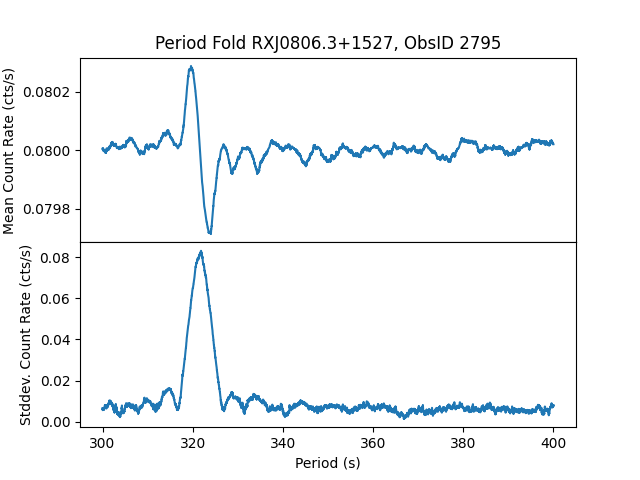

In [22]:
cat << EOM > c4.py
from pycrates import read_file
import matplotlib.pyplot as plt

tab=read_file("RXJ0806.3+1527.fold")
period=tab.get_column("period").values
mean_rate=tab.get_column("mean_rate").values
sigma_rate=tab.get_column("sigma_rate").values

plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.0)
plt.plot(period,mean_rate, marker="None")
plt.ylabel("Mean Count Rate (cts/s)")
plt.title("Period Fold RXJ0806.3+1527, ObsID 2795")

plt.subplot(2,1,2)
plt.plot(period,sigma_rate, marker="None")
plt.ylabel("Stddev. Count Rate (cts/s)")
plt.xlabel("Period (s)")

plt.savefig("chips_04.png")
EOM

python c4.py
display < chips_04.png


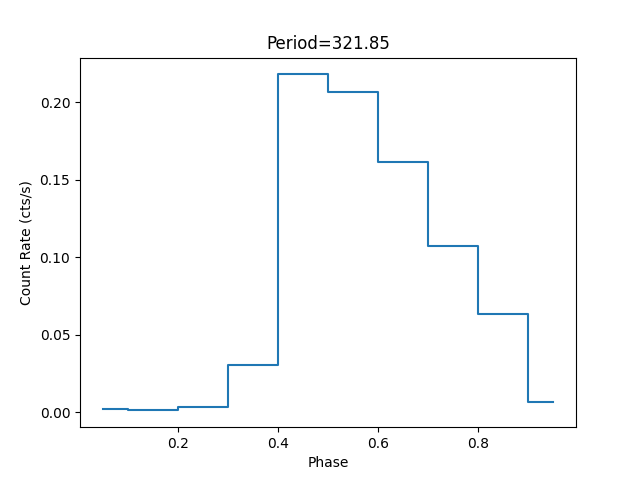

In [23]:
cat << EOM > c4a.py
from pycrates import read_file
import matplotlib.pyplot as plt

tab = read_file("RXJ0806.3+1527.fold[period=321.85]")
x=tab.get_column("phase_mid").values.flatten()
y=tab.get_column("rate").values.flatten()


plt.plot(x,y,marker="None", drawstyle="steps-mid")
plt.title("Period=321.85")
plt.xlabel("Phase")
plt.ylabel("Count Rate (cts/s)")

plt.savefig("chips_04a.png")
EOM

python c4a.py
display < chips_04a.png


### dmtype2split

In [24]:
dmtype2split RXJ0806.3+1527.fold"[period=321.85]" 321.85.fits cl+
dmlist 321.85.fits cols

 
--------------------------------------------------------------------------------
Columns for Table Block SPECTRUM
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   PHASE_MID                         Real8          -Inf:+Inf            
   2   COUNTS                            Int4           -                    
   3   RATE                 counts/sec   Real8          -Inf:+Inf            
   4   ONTIME               sec          Real8          -Inf:+Inf            
   5   DTF                               Real8          -Inf:+Inf            


## Compute Phase


In [25]:
cat << EOM > dmtcalc.expr
.period=321.85
.tzero=121941081.5572
.freq=(1.0/.period)
GPHASE=((time-(.tzero))*.freq)
PHASE=(GPHASE-((long)GPHASE))
EOM

In [26]:
dmtcalc RXJ0806.3+1527_bary.evt RXJ0806.3+1527_phase.evt exp=@dmtcalc.expr clob+ 
dmlist RXJ0806.3+1527_phase.evt cols

 
--------------------------------------------------------------------------------
Columns for Table Block EVENTS
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range
   1   time                 s            Real8          121941081.5572299957:121964444.0203700066 Time elapsed since MJDREF
   2   expno                             Int4           0:2147483647         Exposure number of CCD frame containing event
   3   ccd_id                            Int2           0:9                  CCD reporting event
   4   node_id                           Int2           0:3                  CCD serial readout amplifier node
   5   chip(chipx,chipy)    pixel        Int2           1:1024               Chip coords
   6   tdet(tdetx,tdety)    pixel        Int2           1:8192               ACIS tiled detector coordinates
   7   det(detx,dety)       pixel        Real4          0.50:     8192.50    ACIS detec

In [27]:
dmextract "RXJ0806.3+1527_phase.evt[bin phase=0.0:1.0:0.1]" phase.lc op=generic clob+

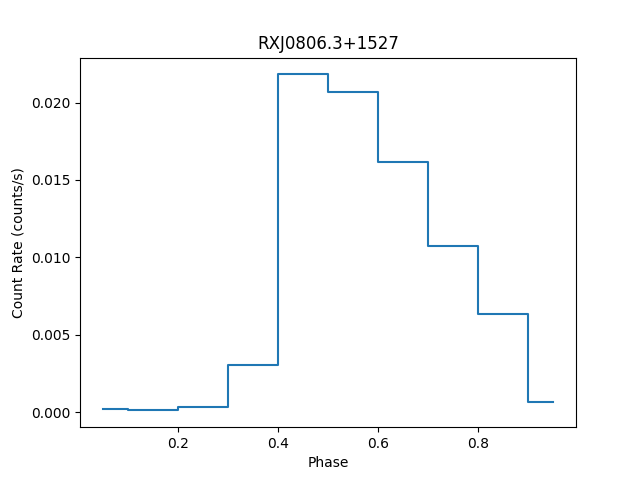

In [28]:
cat << EOM > c5.py 
from pycrates import read_file
import matplotlib.pyplot as plt

tab = read_file("phase.lc")
x = tab.get_column("phase").values
y = tab.get_column("count_rate").values

plt.plot(x,y,drawstyle="steps-mid",marker="None")
plt.xlabel("Phase")
plt.ylabel("Count Rate (counts/s)")
plt.title("RXJ0806.3+1527")

plt.savefig("chips_05.png")
EOM

python c5.py
display < chips_05.png

## Create GTIs

In [29]:
dmtcalc RXJ0806.3+1527_bary.asol RXJ0806.3+1527_phase.asol exp=@dmtcalc.expr clob+

In [30]:
pset dmgti infile=RXJ0806.3+1527_phase.asol
pset dmgti outfile=high.gti
pset dmgti userlimit="((0.4<=phase)&&(phase<0.9))"
dmgti mode=h clobber=yes

In [31]:
dmlist high.gti blocks

 
--------------------------------------------------------------------------------
Dataset: high.gti
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: FILTER                         Table         1 cols x 0        rows
Block    3: GTI                            Table         2 cols x 67       rows


## Align GTIs

In [32]:
pset gti_align times=high.gti
pset gti_align statfile=RXJ0806.3+1527_bary.expstats
pset gti_align outfile=high_align.gti
pset gti_align evtfile=RXJ0806.3+1527_bary.evt
gti_align mode=h clobber=yes

gti_align
           times = high.gti
        statfile = RXJ0806.3+1527_bary.expstats
         outfile = high_align.gti
         evtfile = RXJ0806.3+1527_bary.evt
         clobber = yes
         verbose = 1
            mode = h



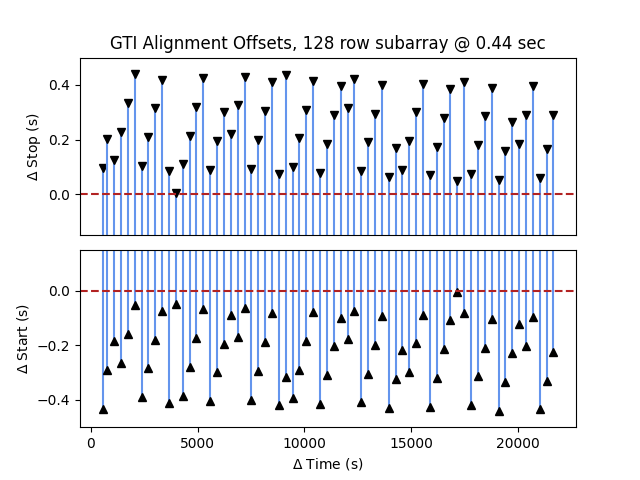

In [33]:
cat << EOM > c6.py
from pycrates import read_file
import matplotlib.pylab as plt

orig = read_file("high.gti[3]")
orig_lo = orig.get_column("start").values-121941091.557230
orig_hi = orig.get_column("stop").values-121941091.557230
fix = read_file("high_align.gti[3]")
lo = fix.get_column("start").values-121941091.557230
hi = fix.get_column("stop").values-121941091.557230

plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.08, wspace=0.0)

for l,h,ol,oh in zip( lo, hi, orig_lo, orig_hi ):
    plt.plot([ol, ol], [l-oh, h-oh], marker="v", color="cornflowerblue",mfc="black",mec="black" )

plt.ylabel(r"$\Delta$ Stop (s)")
plt.title("GTI Alignment Offsets, 128 row subarray @ 0.44 sec")
plt.ylim(-0.15, 0.5)
plt.axhline(0, color="firebrick", linestyle='--' )
plt.gca().set_xticks([]) # hide x-ticks here

plt.subplot(2,1,2)

for l,h,ol,oh in zip( lo, hi, orig_lo, orig_hi ):
    plt.plot( [ol, ol], [l-ol, h-ol], marker="^", color="cornflowerblue",mfc="black",mec="black" )

plt.ylabel(r"$\Delta$ Start (s)")
plt.xlabel(r"$\Delta$ Time (s)")
plt.ylim( -0.5, 0.15)
plt.axhline(0, color="firebrick", linestyle="--")
plt.savefig("chips_06.png")

EOM

python  c6.py
display < chips_06.png

In [34]:
dmkeypar "RXJ0806.3+1527_bary.evt[@high.gti]" ontime echo+

10601.9740087092


In [35]:
dmkeypar "RXJ0806.3+1527_bary.evt[@high_align.gti]" ontime echo+

10633.0197870433


## Display good time

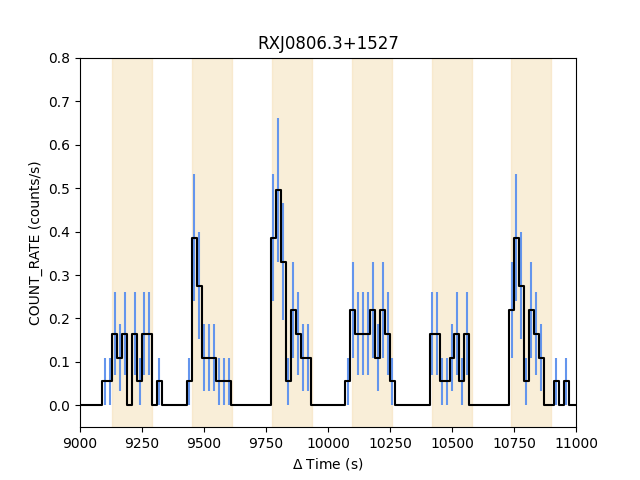

In [36]:
cat << EOM > c7.py
from pycrates import read_file
import matplotlib.pylab as plt

tab = read_file("RXJ0806.3+1527.lc")
xx = tab.get_column("dt").values
yy = tab.get_column("count_rate").values
ye = tab.get_column("count_rate_err").values
plt.errorbar( xx, yy, yerr=ye, color="black", marker="None", ecolor="cornflowerblue", drawstyle="steps-mid")

gti = read_file("high_align.gti[gti7]")
lo = gti.get_column("start").values-121941091.557230
hi = gti.get_column("stop").values-121941091.557230
for l,h in zip(lo,hi):
    plt.fill( [l,l,h,h], [-1,1,1,-1], color="wheat", alpha=0.5)
    
plt.xlim(9000,11000)
plt.ylim(-0.05, 0.8)
plt.ylabel("COUNT_RATE (counts/s)")
plt.xlabel(r"$\Delta$ Time (s)")
plt.title("RXJ0806.3+1527")

plt.savefig("chips_07.png")
EOM

python c7.py
display < chips_07.png


## Extract Spectrum


In [37]:
dmcopy RXJ0806.3+1527_bary.evt"[@high_align.gti]" RXJ0806.3+1527_high.evt clob+

In [38]:
specextract "RXJ0806.3+1527_high.evt[sky=region(ciao.reg)]" RXJ0806.3+1527_high clob+


Running specextract
Version: 26 May 2021

Using event file RXJ0806.3+1527_high.evt[sky=region(ciao.reg)]

Aspect solution file RXJ0806.3+1527_bary.asol found.

Bad-pixel file acisf02795_repro_bpix1.fits found.

Mask file acisf02795_000N004_msk1.fits found.

Setting bad pixel file 

Extracting src spectra 

Creating src ARF 

Using mkacisrmf...

Creating src RMF 

Grouping src spectrum 

Updating header of RXJ0806.3+1527_high.pi with RESPFILE and ANCRFILE keywords.

Updating header of RXJ0806.3+1527_high_grp.pi with RESPFILE and ANCRFILE keywords.



read ARF file RXJ0806.3+1527_high.arf
read RMF file RXJ0806.3+1527_high.rmf


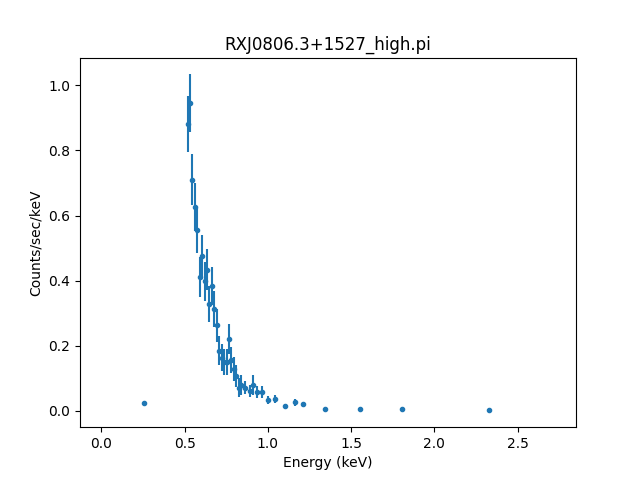

In [39]:
cat << EOM > s1.py
from sherpa.astro.ui import *
load_data("RXJ0806.3+1527_high.pi")
group_counts(10)
notice(0.3, 2.0 )
plot_data()

import matplotlib.pylab as plt
plt.savefig("sherpa_01.png")
EOM

python s1.py
display < sherpa_01.png


# Cleanup


In [40]:
/bin/rm -f acisf* pcadf* 
/bin/rm -rf 2795